In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()

In [11]:
DATA = "data/"

In [14]:
train = pd.read_csv(f"{DATA}train.csv")
test = pd.read_csv(f"{DATA}public_test.csv")
train

,context,answer,label
0,**Вы:** Спасибо большое)).\nКакую музыку слуша...,"Ой, ну тогда давай я тебе порекомендую что-ниб...",ai
1,**Вы:** Я тоже не замужем. Ищу своего принца. ...,"Может быть и тихие, но совсем не мирные, могут...",people
2,**Вы:** Ивановская область.\n\n**Собеседник:**...,В деревне у меня на даче.,ai
3,**Вы:** Особенно чинить их.\n\n**Собеседник:**...,"В доме - полный порядок, все на своем месте.",ai
4,**Вы:** В свободное время.\n\n**Собеседник:** ...,"Да, я фотографирую, это моя страсть и хобби.",ai
...,...,...,...
6146,**Вы:** А ты одна в семье? Или к шести кошкам ...,Неа это ответ на вопрос про 12 братьев 😜.,ai
6147,**Вы:** Хочешь на море?\n\n**Собеседник:** Ест...,"А у меня книги, возможно единственное моё хобб...",people
6148,**Вы:** Люблю детей.\r\nПрям с птицей на кемпи...,А что случилось?,people
6149,"**Вы:** Эх, а я за Барсу).\r\nУ меня мама сейч...","Хочешь, я научу тебя?",people


In [26]:
train["label"].value_counts()

label
people    3123
ai        3028
Name: count, dtype: int64

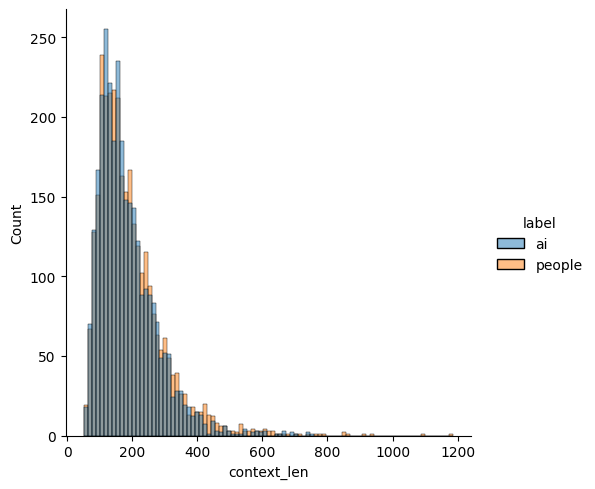

In [36]:
train["context_len"] = train["context"].apply(lambda x: len(x))
sns.displot(data=train, x="context_len", hue="label")

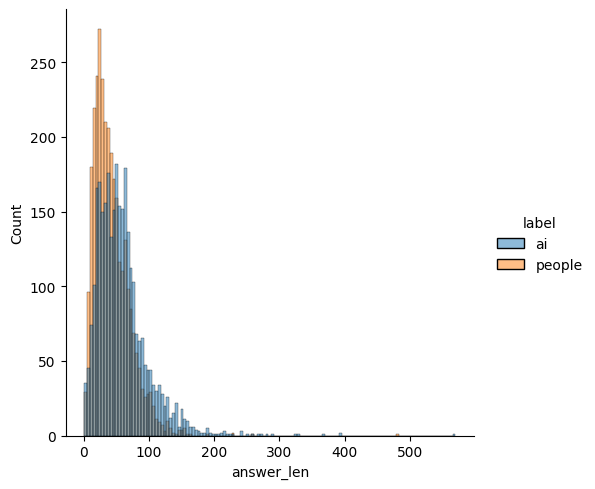

In [52]:
train["answer_len"] = train["answer"].apply(lambda x: len(x))
sns.displot(data=train, x="answer_len", hue="label")

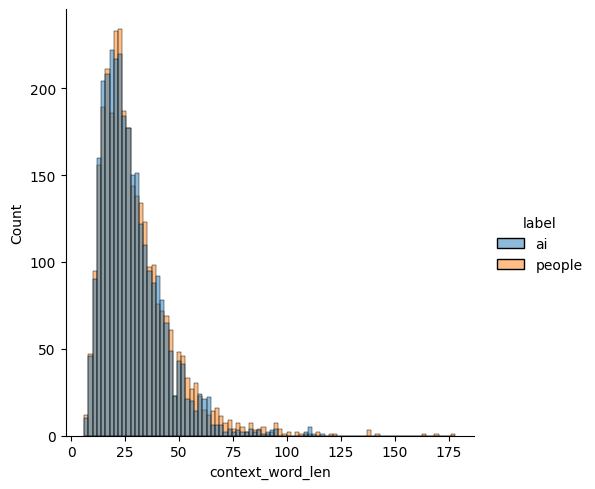

In [37]:
train["context_word_len"] = train["context"].apply(lambda x: len(x.split()))
sns.displot(data=train, x="context_word_len", hue="label")

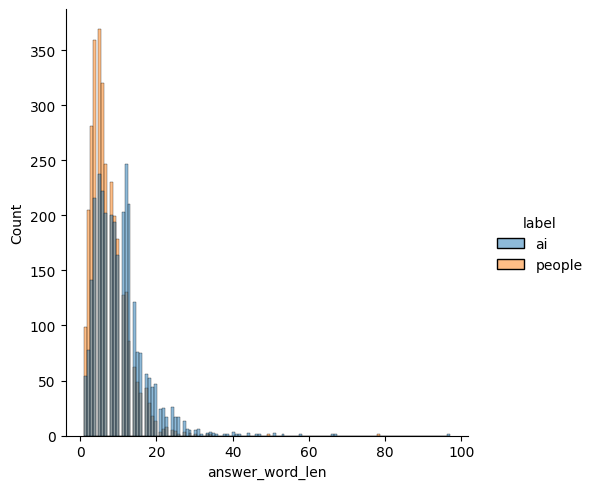

In [53]:
train["answer_word_len"] = train["answer"].apply(lambda x: len(x.split()))
sns.displot(data=train, x="answer_word_len", hue="label")

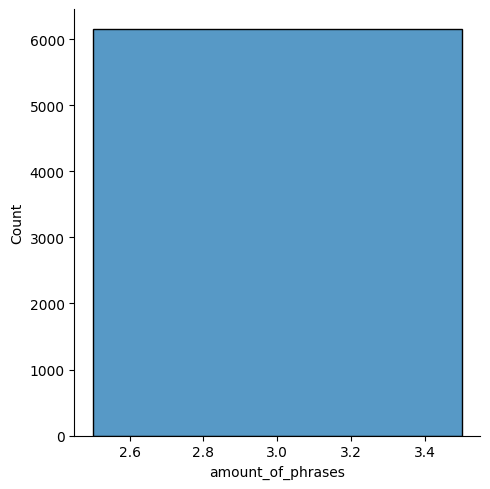

In [42]:
train["amount_of_phrases"] = train["context"].apply(lambda x: x.count("**Вы:**") + x.count("**Собеседник:**"))
sns.displot(data=train, x="amount_of_phrases")

In [45]:
train["amount_of_phrases"].unique()

array([3])

In [46]:
train["amount_of_phrases_2"] = train["context"].apply(lambda x: len(x.split("\n\n")))
train["amount_of_phrases_2"].unique()

array([3])

In [65]:
unique_symbols = set(list("".join(list(train.context)) + "".join(list(test.context))))
unique_symbols

{'\n',
 '\r',
 ' ',
 '!',
 '$',
 '%',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'Y',
 '\\',
 '^',
 '_',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 '}',
 '«',
 '»',
 '÷',
 '́',
 'А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'Й',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Ф',
 'Х',
 'Ц',
 'Ч',
 'Ш',
 'Щ',
 'Ы',
 'Ь',
 'Э',
 'Ю',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 'є',
 'і',
 '\u200d',
 '–',
 '—',
 '’',
 '…',
 '₽',
 '☄',
 '☝',
 '☹',
 '☺',
 '♀',
 '♂',
 '♍',
 '♥',
 '

In [63]:
unique_symbols = set(list("".join(list(train.answer)) + "".join(list(test.answer))))
unique_symbols

{'\n',
 ' ',
 '!',
 '"',
 '$',
 '%',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'T',
 'W',
 'X',
 'Y',
 'Z',
 '^',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '«',
 '»',
 'А',
 'Б',
 'В',
 'Г',
 'Д',
 'Е',
 'Ж',
 'З',
 'И',
 'Й',
 'К',
 'Л',
 'М',
 'Н',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'У',
 'Ф',
 'Х',
 'Ц',
 'Ч',
 'Ш',
 'Щ',
 'Ь',
 'Э',
 'Ю',
 'Я',
 'а',
 'б',
 'в',
 'г',
 'д',
 'е',
 'ж',
 'з',
 'и',
 'й',
 'к',
 'л',
 'м',
 'н',
 'о',
 'п',
 'р',
 'с',
 'т',
 'у',
 'ф',
 'х',
 'ц',
 'ч',
 'ш',
 'щ',
 'ъ',
 'ы',
 'ь',
 'э',
 'ю',
 'я',
 'ё',
 '\u200d',
 '–',
 '—',
 '♂',
 '和',
 '愛',
 '️',
 '🏻',
 '👩',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😉',
 '😊',
 '😋',
 '😍',
 '😜',
 '🙂',
 '🤛'

In [70]:
emojies_answer = {
 '🏻',
 '👩',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😉',
 '😊',
 '😋',
 '😍',
 '😜',
 '🙂',
 '🤛',
 '🤷',
 '🥰'
}

emojies_context = {
 '✊',
 '✋',
 '✌',
 '✨',
 '❤',
 '️',
 '！',
 '）',
 '？',
 '🌍',
 '🌞',
 '🌳',
 '🌷',
 '🌹',
 '🍗',
 '🍦',
 '🍭',
 '🍺',
 '🍼',
 '🎉',
 '🏻',
 '🏼',
 '🏽',
 '🏿',
 '🐈',
 '🐋',
 '🐍',
 '🐜',
 '🐟',
 '🐱',
 '🐹',
 '👋',
 '👌',
 '👍',
 '👎',
 '👏',
 '👑',
 '👣',
 '👦',
 '💃',
 '💆',
 '💋',
 '💐',
 '💑',
 '💙',
 '💚',
 '💡',
 '💪',
 '💫',
 '💼',
 '📸',
 '🔥',
 '🕺',
 '🖖',
 '🖤',
 '😀',
 '😁',
 '😂',
 '😃',
 '😄',
 '😅',
 '😆',
 '😇',
 '😈',
 '😉',
 '😊',
 '😋',
 '😌',
 '😍',
 '😎',
 '😏',
 '😐',
 '😒',
 '😔',
 '😕',
 '😗',
 '😘',
 '😜',
 '😝',
 '😞',
 '😟',
 '😡',
 '😢',
 '😣',
 '😥',
 '😩',
 '😪',
 '😬',
 '😭',
 '😱',
 '😲',
 '😳',
 '😶',
 '😸',
 '😹',
 '😺',
 '🙀',
 '🙁',
 '🙂',
 '🙃',
 '🙄',
 '🙈',
 '🙌',
 '🙏',
 '🚀',
 '🚙',
 '🤑',
 '🤓',
 '🤔',
 '🤗',
 '🤘',
 '🤚',
 '🤛',
 '🤜',
 '🤟',
 '🤣',
 '🤦',
 '🤧',
 '🤩',
 '🤪',
 '🤫',
 '🤭',
 '🤷',
 '🥘',
 '🥰',
 '🥳',
 '🦉',
 '🦔',
 '🧐',
 '🧶',
 '🧸'
}

punct = {
    ".",
    ",",
    "!",
    "@",
    "№",
    "?",
    "+",
    "=",
    "-",
    "*",
    "_",
    "#",
    "$",
    "%",
    "^",
    "&",
    ":",
    ";",
}

In [71]:
def count_answer_emoji(string):
    c = 0
    for char in string:
        if char in emojies_answer:
            c += 1
    
    return c


def count_context_emoji(string):
    c = 0
    for char in string:
        if char in emojies_context:
            c += 1
    
    return c


def count_punct(string):
    c = 0
    for char in string:
        if char in punct:
            c += 1
    
    return c

train["answer_emojies"] = train["answer"].progress_apply(count_answer_emoji)
train["context_emojies"] = train["context"].progress_apply(count_context_emoji)
train["answer_punct"] = train["answer"].progress_apply(count_punct)
train["context_punct"] = train["context"].progress_apply(count_punct)

  0%|          | 0/6151 [00:00<?, ?it/s]

  0%|          | 0/6151 [00:00<?, ?it/s]

  0%|          | 0/6151 [00:00<?, ?it/s]

  0%|          | 0/6151 [00:00<?, ?it/s]

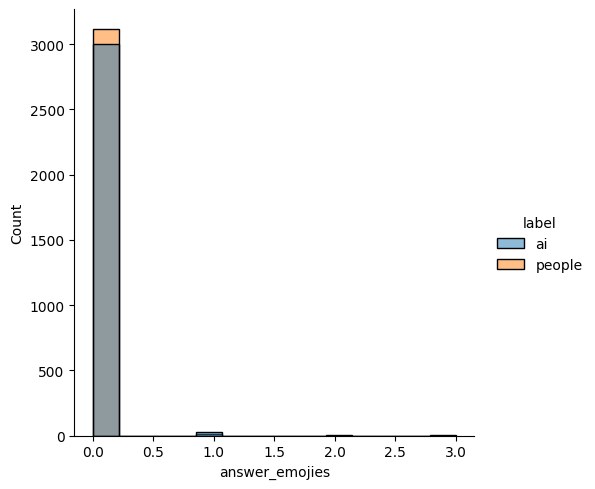

In [68]:
sns.displot(data=train, x="answer_emojies", hue="label")

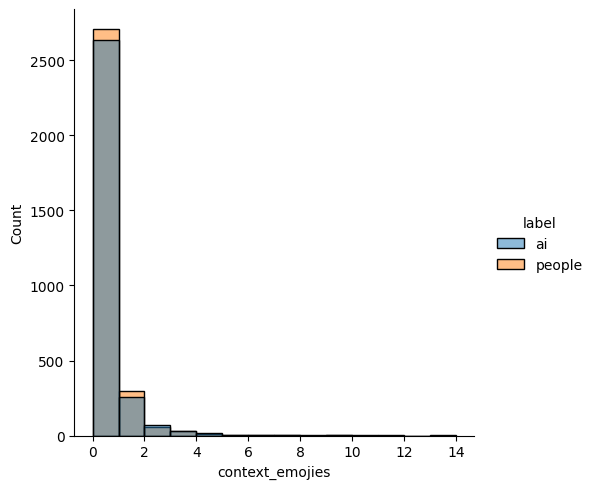

In [69]:
sns.displot(data=train, x="context_emojies", hue="label")

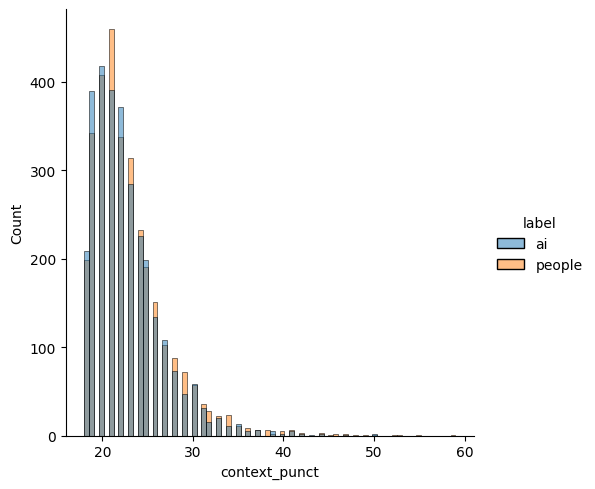

In [73]:
sns.displot(data=train, x="context_punct", hue="label")

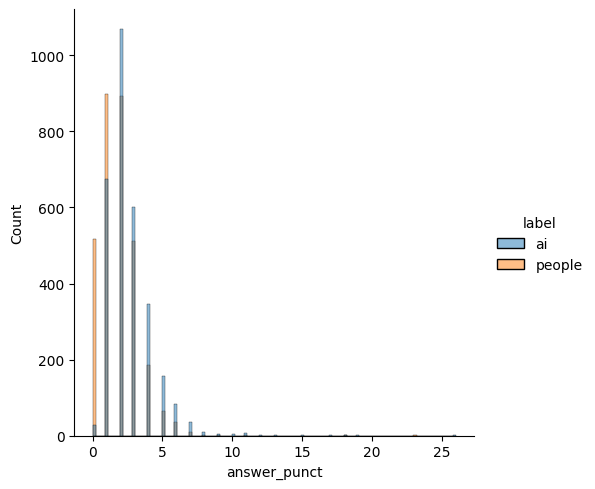

In [74]:
sns.displot(data=train, x="answer_punct", hue="label")

In [89]:
from collections import Counter

people_clean_answer = " ".join(list(train["answer"][train["label"] == "people"].apply(lambda x: "".join([char for char in x if (char.isalnum() or char == " ")])))).split()
ai_clean_answer = " ".join(list(train["answer"][train["label"] == "ai"].apply(lambda x: "".join([char for char in x if (char.isalnum() or char == " ")])))).split()

In [90]:
Counter(people_clean_answer)

Counter({'А': 725,
         'в': 462,
         'не': 449,
         'и': 406,
         'ты': 358,
         'на': 311,
         'я': 303,
         'у': 274,
         'а': 256,
         'Я': 237,
         'что': 220,
         'с': 189,
         'есть': 188,
         'люблю': 186,
         'тебя': 177,
         'тоже': 176,
         'Да': 175,
         'это': 173,
         'как': 172,
         'меня': 164,
         'но': 126,
         'очень': 122,
         'по': 105,
         'У': 104,
         'тебе': 102,
         'нет': 97,
         'В': 88,
         'бы': 86,
         'или': 85,
         'так': 85,
         'любишь': 82,
         'вы': 78,
         'Ну': 77,
         'нравится': 77,
         'Как': 73,
         'И': 71,
         'Не': 69,
         'чем': 68,
         'мне': 67,
         'за': 65,
         'Нет': 64,
         'то': 64,
         'много': 62,
         'к': 60,
         'из': 59,
         'Это': 59,
         'уже': 58,
         'Ты': 58,
         'больше': 57,
         'е

In [91]:
Counter(ai_clean_answer)

Counter({'и': 1132,
         'я': 831,
         'Я': 825,
         'это': 733,
         'А': 679,
         'в': 587,
         'что': 551,
         'люблю': 547,
         'не': 463,
         'ты': 422,
         'тоже': 409,
         'у': 404,
         'на': 359,
         'но': 322,
         'очень': 320,
         'меня': 296,
         'Да': 280,
         'есть': 280,
         'здорово': 232,
         'с': 230,
         'Но': 223,
         'тебя': 157,
         'как': 151,
         'мне': 148,
         'О': 140,
         'особенно': 135,
         'У': 131,
         'тебе': 127,
         'о': 118,
         'для': 115,
         'время': 114,
         'могу': 112,
         'Как': 108,
         'нравится': 102,
         'еще': 99,
         'всегда': 98,
         'нет': 97,
         'много': 93,
         'работаю': 93,
         'за': 90,
         'так': 89,
         'Вы': 89,
         'уже': 87,
         'вы': 85,
         'какие': 83,
         'Конечно': 82,
         'по': 82,
         'бы':